# Pre Requisits

In [ ]:
# @title Run Once
!git clone https://github.com/Djone08/Sign_Language_Detection

In [2]:
# @title Imports
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import asarray

In [109]:
# @title Set Path
path = "/content/Sign_Language_Detection/Data" # @param {"type":"string"}

In [4]:
# @title Load Data
test_data = pd.read_csv(f'{path}/sign_mnist_test.csv')

train_data = pd.read_csv(f'{path}/sign_mnist_train.csv')

# Understanding & Visualizing Data Structure

In [5]:
print('Null Values in Train Data:', train_data.isna().sum().sum())
print('Null Values in Test Data:', test_data.isna().sum().sum())

Null Values in Train Data: 0
Null Values in Test Data: 0


In [6]:
print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)

Train Data Shape: (27455, 785)
Test Data Shape: (7172, 785)


In [7]:
test_split = test_data.shape[0]/(test_data.shape[0] + train_data.shape[0])
print(f"Test Data Split Percentage: {test_split:.1%}")
print(f"Train Data Split Percentage: {1-test_split:.1%}")

Test Data Split Percentage: 20.7%
Train Data Split Percentage: 79.3%


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [9]:
test_data.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107


In [10]:
print('Unique Label Categories:', test_data.label.sort_values().unique(), sep='\n')

Unique Label Categories:
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


# Creating Model

## Pre Processing Data

In [11]:
# @title Test and Train Label Split
x_train = np.array(train_data.drop(columns=['label']))
y_train = np.array(train_data['label'])
x_test = np.array(test_data.drop(columns=['label']))
y_test = np.array(test_data['label'])

In [12]:
# @title Reshaping Data
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [13]:
print(f'{x_train.shape = }')
print(f'{y_train.shape = }')
print(f'{x_test.shape = }')
print(f'{y_test.shape = }')

x_train.shape = (27455, 28, 28, 1)
y_train.shape = (27455,)
x_test.shape = (7172, 28, 28, 1)
y_test.shape = (7172,)


In [14]:
# @title Normalisation of Pixel Data
x_train = x_train/255.0
x_test = x_test/255.0

## Training CNN Model

In [15]:
# @title Creating Model with Sequential API
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(15, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# @title Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 375)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          48,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,326 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,749 (237.30 KB)

 Trainable params: 60,749 (237.30 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# @title Compiling and Training Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9502 - val_loss: 0.2705
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9442 - val_loss: 0.3653
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9416 - val_loss: 0.2381
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9477 - val_loss: 0.2831
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy: 0.9520 - val_loss: 0.2729
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0041 - val_accuracy: 0.9226 - val_loss: 0.4136
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9979 - loss: 0.0056 - val_accuracy: 0.9446 - val_loss: 0.3339
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9974 - loss: 0.0089 - val_accuracy: 0

In [80]:
# @title Evaluating Model
model.evaluate(x_test, y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9220 - loss: 0.3287


[0.30429455637931824, 0.9258226156234741]

## Saving Model

In [107]:
model.save('sign_language_mnist_cnn.keras')

# Model Testing

## Testing with an Image from Test Dataset

In [59]:
# @title Set Test index in Range of 0 to 7172
test_index = 1000 # @param {'type': 'integer'}

# Model takes input as 4 dimensions, so we reshape it.
testImage = x_test[test_index].reshape(-1,28,28,1)

prediction = model.predict(testImage)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1.9335372e-14 6.5261802e-10 6.5370598e-13 9.9974364e-01 3.2665737e-15
  1.6439698e-10 1.0721346e-08 1.0875515e-10 2.7062963e-09 1.5459367e-15
  2.4169487e-05 9.0508083e-06 2.4392578e-12 1.3884437e-11 6.0097198e-11
  8.4205420e-10 1.5186564e-09 2.0821227e-04 1.6267033e-09 2.1932868e-08
  1.4152716e-06 9.5475962e-06 8.3167237e-11 3.9138927e-06 9.1440738e-10
  3.3710942e-12]]


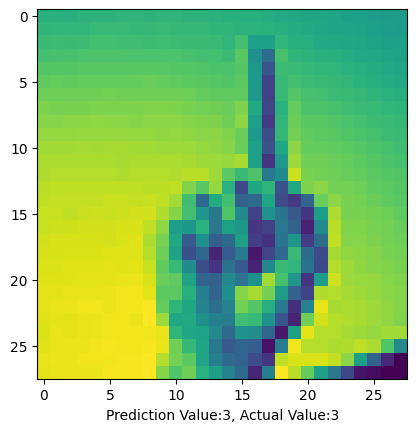

In [60]:
# @title Visualising Prediction
plt.imshow(testImage.reshape(28, 28))
plt.xlabel(f"Prediction Value:{np.argmax(prediction)}, Actual Value:{y_test[test_index]}")
plt.show()

## Testing with an Inmage from External Source

In [101]:
# @title Importing Image
from PIL import Image
image_path = '/content/snip.jpg' # @param {'type': 'string'}
image = Image.open(image_path)

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(96, 110)
RGB


### Pre Processing Image

In [102]:
# @title Resizing the Image
newsize = (28, 28)
image_res = image.resize(newsize)
image_res

In [103]:
# @title Converting Image to Grayscale
image_grey = image_res.convert('L')
image_grey

In [104]:
# @title Converting Image to Array
image_arr = asarray(image_grey)
image_arr.shape

(28, 28)

### Predecting Image

In [105]:
prediction = model.predict(image_arr.reshape(-1,28,28,1))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


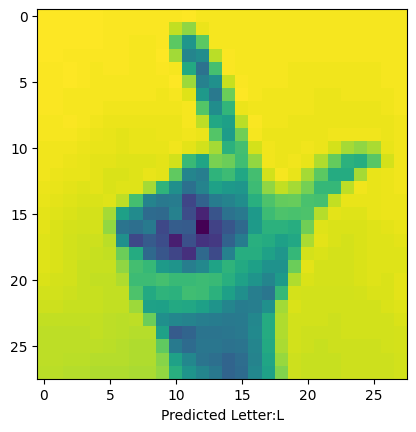

In [106]:
# @title Visualising Prediction
plt.imshow(image_arr)
plt.xlabel(f"Predicted Letter:{chr(np.argmax(prediction)+65)}")
plt.show()